In [55]:
import numpy as np
from math import log
import matplotlib.pyplot as plt  
import myLib

In [66]:
#Q1
r=[]     # array for radial distance for each trial in N
n = 200
seeds = np.random.randint(0,999,500)   # Random seeds for each walker
print("No of steps N=",n)

for i in range(500):       # 100 trials for each N
    # intialising
    x = [0.0 for j in range(n+1)]  # array for random x
    y = [0.0 for k in range(n+1)]  # array for random y

    randos = myLib.MLCG_RNG(m = 16381, a = 572, seed = seeds[i], n = n)  #Personal MLCG pseudorandom number generator

    sumx,sumy,xd,yd = 0.0,0.0,0.0,0.0
    for l in range(n):    # n steps
        theta = randos[l]*2*np.pi   # random value of theta in [0,2pi]

        x[l+1]=x[l]+np.sin(theta)   # next x value
        y[l+1]=y[l]+np.cos(theta)   # next y value

    for k in range(n):
        sumx+=(x[k+1]-x[k])   # sum of del(x)
        sumy+=(y[k+1]-y[k])   # sum of del(y)

    # finding average displacement in x and y axes (mean)
    xd=sumx/n
    yd=sumy/n

    p=np.sqrt(((x[n]-x[0])**2)+((y[n]-y[0])**2)) # radial distance for ith trial

    r.append(p)

sum=0.0
for c in range(len(r)):
    sum+=r[c]**2      # sum of square of radial distances

# square root of mean of the sum= R_rms
rms=np.sqrt(sum/len(r))
print("Value of R_rms=",rms)
print()
print("Theoretically, R_rms=",np.sqrt(n))

"""
R_rms from random walks = 14.13229
Square root of N = 14.1421356

So, the values are pretty close.
"""


No of steps N= 200
Value of R_rms= 14.132290182442118

Theoretically, R_rms= 14.142135623730951


'\nR_rms from random walks = 16.71429\nSquare root of N = 14.1421356\n\nSo, the values are pretty close\n'

[ 0.06965551  0.00362405 -0.01208119  0.01142621  0.11049259] 7.4844623591086075


'\nCoefficients = [ 0.06965551  0.00362405 -0.01208119  0.01142621  0.11049259]\nCondition NUmber = 7.4844623591086075\n'

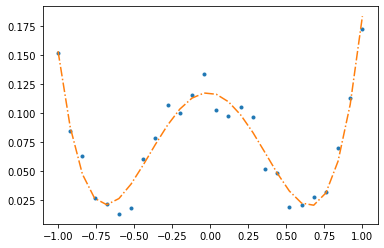

In [96]:
#Q2
def Lege(i,X):
        if(i == 0): return 1
        if(i == 1): return X
        if(i == 2): return 0.5*(3*X*X-1)
        if(i == 3): return 0.5*((5*X*X*X)-(3*X))
        if(i == 4): return (1/8)*((35*X*X*X*X)-(30*X*X)+3)
        if(i == 5): return (1/8)*((63*X*X*X*X*X)-(70*X*X*X)+(15*X))
        if(i == 6): return (1/16)*((231*X*X*X*X*X*X)-(315*X*X*X*X)+(105*X*X)-5)

Data = myLib.file_opener("endsemfitdata.txt")
X = []
Y = []
for i in range(len(Data)):
    X.append(Data[i][0])
    Y.append(Data[i][1])

# Looking at the scatter plot, we go order 5, i.e upto x^4 terms.

C,cov,cond =  myLib.ChebyPolynomialChiSqFit(X, Y, n=5)

yfit = []
for i in range(len(X)):
    sum = 0
    for j in range(5):
        sum += C[j]*Lege(j,X[i])
    yfit.append(sum)

plt.plot(X,Y,'.')
plt.plot(X,yfit,'-.')
print(C,cond)

"""
Coefficients = [ 0.06965551  0.00362405 -0.01208119  0.01142621  0.11049259]
Condition NUmber = 7.4844623591086075
"""

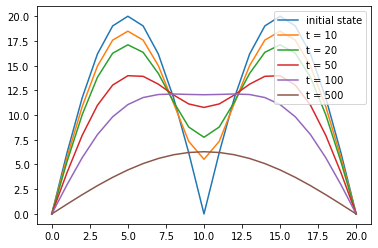

'\nAs time passes, the temperature distribution starts to smoothen out such that the neigbouring places have similar temperature.\nThis leads to the curve losing its two distinct peak and instead attaining one peak in the centre because at boundary we always the teperature set to 0.\nAlso, since there is no source of temperature and the boundaries will always have zero temperature, the overall temperature\nstarts to decrease as well. Eventually after 5000 steps, the temperature graident would become almost zero.\n'

In [79]:
#Q3
# k=1
# dx = 0.1
# dt = 0.0008
#length of ini = 20
#tsteps = 5000

def a(t):
    return 0
def b(t):
    return 0

ini_x = np.linspace(0,2,21)

ini = np.zeros(len(ini_x))
for i in range(len(ini_x)):
    ini[i] = 20*abs(np.sin(np.pi*ini_x[i]))
ini = np.round(ini,6)

#Explicit
sol1 = myLib.explicitPDEHeat(ini,a,b,1,0.0008,0.1,10)
sol2 = myLib.explicitPDEHeat(ini,a,b,1,0.0008,0.1,20)
sol3 = myLib.explicitPDEHeat(ini,a,b,1,0.0008,0.1,50)
sol4 = myLib.explicitPDEHeat(ini,a,b,1,0.0008,0.1,100)
sol5 = myLib.explicitPDEHeat(ini,a,b,1,0.0008,0.1,500)
s = len(ini)

plt.plot(range(s),ini, label = 'initial state')
plt.plot(range(s),sol1, label = 't = 10')
plt.plot(range(s),sol2, label = 't = 20')
plt.plot(range(s),sol3, label = 't = 50')
plt.plot(range(s),sol4, label = 't = 100')
plt.plot(range(s),sol5, label = 't = 500')
plt.legend()
plt.show()

"""
As time passes, the temperature distribution starts to smoothen out such that the neigbouring places have similar temperature.
This leads to the curve losing its two distinct peak and instead attaining one peak in the centre because at boundary we always the teperature set to 0.
Also, since there is no source of temperature and the boundaries will always have zero temperature, the overall temperature
starts to decrease as well. Hence, giving us the plot that we see.
"""


In [83]:
#Q4
def V(x):
    return 1/(np.sqrt(1+(x*x)))

#Take abscissa and weights from table
# n = 4
s4 = [0.861136311,0.339981043,-0.339981043,-0.861136311]
w4 = [0.347854845,0.652145154,0.652145154,0.347854845]

# n = 5
s5 = [0.906179845,0.538469310,0,-0.538469310,-0.906179845]
w5 = [0.236926885,0.478628670,0.568888889,0.478628670,0.236926885]

# n = 6
s6 = [0.932469514,0.661209386,0.238619186,-0.238619186,-0.661209386,-0.932469514]
w6 = [0.171324492,0.360761573,0.467913934,0.467913934,0.360761573,0.171324492]

def gaussLegendreIntegral(func,s,w):
    sum = 0
    for i in range(len(s)):
        sum += w[i] * func(s[i])

    return sum

sol4 = gaussLegendreIntegral(V,s4,w4)
sol5 = gaussLegendreIntegral(V,s5,w5)
sol6 = gaussLegendreIntegral(V,s6,w6)

rsol4 = round(sol4,10)
rsol5 = round(sol5,10)
rsol6 = round(sol6,10)
print("Original values for n = 4,5,6 respectively:",sol4,sol5,sol6)
print("Rounded off values for n = 4,5,6 respectively:",rsol4,rsol5,rsol6)

"""
The values are ientical upto 3rd decimal place. However, from 4th place onwards they all become different.

The order of magnitude of the integral based on the number of points is 4<5<6.
"""


Original values for n = 4,5,6 respectively: 1.7620541789046658 1.7628552954010728 1.7627300484997592
Rounded off values for n = 4,5,6 respectively: 1.7620541789 1.7628552954 1.7627300485


'\nThe values are ientical upto 3rd decimal place. However, from 4th place onwards they all become different.\n\nThe order of magnitude of the integral based on the number of points is 4<5<6.\n'